In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import glob, os
import numpy as np
from pathlib import Path

pathToFile = os.path.abspath('')

In [2]:
def printStatistics(array, name):
    avg = np.average(array)
    med = np.median(array)
    std = np.std(array)
    
    print(name, '\tAvg:', f'{avg:12.2f}', '\tMed:', f'{med:12.2f}', '\tStd:', f'{std:12.2f}')
    return (avg, med, std)

def selectNumberFromLines(lines, nameToSearchFor):
    return list(filter(lambda x: x.find(nameToSearchFor) != -1, lines))[0].split(': ')[1]
    
def calcAvgResults(path):

    os.chdir(path)
    nrFiles = len(glob.glob("*.info"))
    print(nrFiles, 'files')
    makeSpans = np.zeros(nrFiles, dtype = 'float_')
    tardiness = np.zeros(nrFiles)
    runtimes = np.zeros(nrFiles)
    iterations = np.zeros(nrFiles)
    i = 0
    
    for filename in glob.glob("*.info"):
        f = open(filename, "r")
        lines = f.read().split('\n') 
        
        makeSpans[i] = selectNumberFromLines(lines, 'Makespan')
        tardiness[i] = selectNumberFromLines(lines, 'Tardiness')
        #strRuntime = selectNumberFromLines(lines, 'runtime')
        #runtimes[i] = strRuntime.replace('s', '')
        
        doPrintIterations = True
        try:
            iterations[i] = selectNumberFromLines(lines, 'iterations')
        except IndexError:
            doPrintIterations = False
        finally:
            i += 1
        
    printStatistics(tardiness, 'Tardiness')
    printStatistics(makeSpans, 'Makespan')
    if doPrintIterations:
        printStatistics(iterations, 'Iterations')
    printStatistics(runtimes, 'Runtime')
   

    
def compareDifferentRuns(paths, ylim = None, names = None, pictureFileName = None):
    results = {}
    runNames = []
    for path in paths:
        thisRunName = path.split('/')[-1]
        runNames.append(thisRunName)
        os.chdir(path)

        nrFiles = len(glob.glob("*.info"))

        for filename in glob.glob("*.info"):
            f = open(filename, "r")
            lines = f.read().split('\n') 
            name = filename.split('.')[0]
            if not(name in results):
                results[name]  = {}
            
            try:
                results[name][thisRunName] = {'Makespan': int(selectNumberFromLines(lines, 'Makespan')), 
                                    'Tardiness': int(selectNumberFromLines(lines, 'Tardiness'))}
            except IndexError:
                results[name][thisRunName] = {'Makespan': sys.maxsize, 
                                    'Tardiness': sys.maxsize}
            
    resultsSplitPerRun = {}
    
    if(names == None):
        names = runNames
    
    for i,name in enumerate(runNames):
        localResults = []
        for result in results.items():
            if(name in result[1]):
                localResults.append(result[1][name]['Tardiness'])
            else:
                localResults.append(0)
        resultsSplitPerRun[names[i]] = localResults
    
    labels = results.keys()
    
    
    
    df = pd.DataFrame(resultsSplitPerRun, index=labels)
    
    
    ax = df.plot.bar(rot=0)
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.xticks(rotation = 45)
    plt.yscale("log")

    ax.set(xlabel='Problem', ylabel='log(Tardiness)',
       title='Tardiness per problem and solver')
    if(ylim != None):
        plt.ylim(1, ylim)
        
    if pictureFileName is not None:
       plt.savefig(pathToFile  + '//Pictures//' + pictureFileName + '.png') 
    

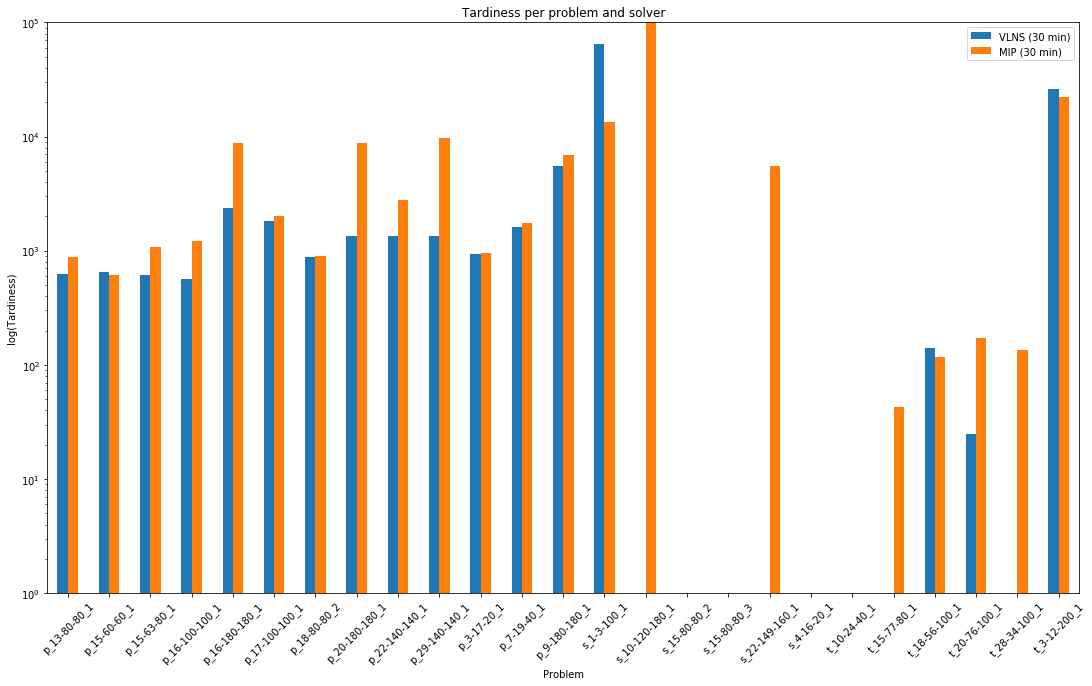

In [7]:
compareDifferentRuns(["C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0703_VLNS_1800s",
                     "C:/Users/Fabian/Desktop/Informatik/CO/Experiments/MIP_30Min_each"], 100000, 
                     ["VLNS (30 min)", "MIP (30 min)"], "VLNSvsMIP")

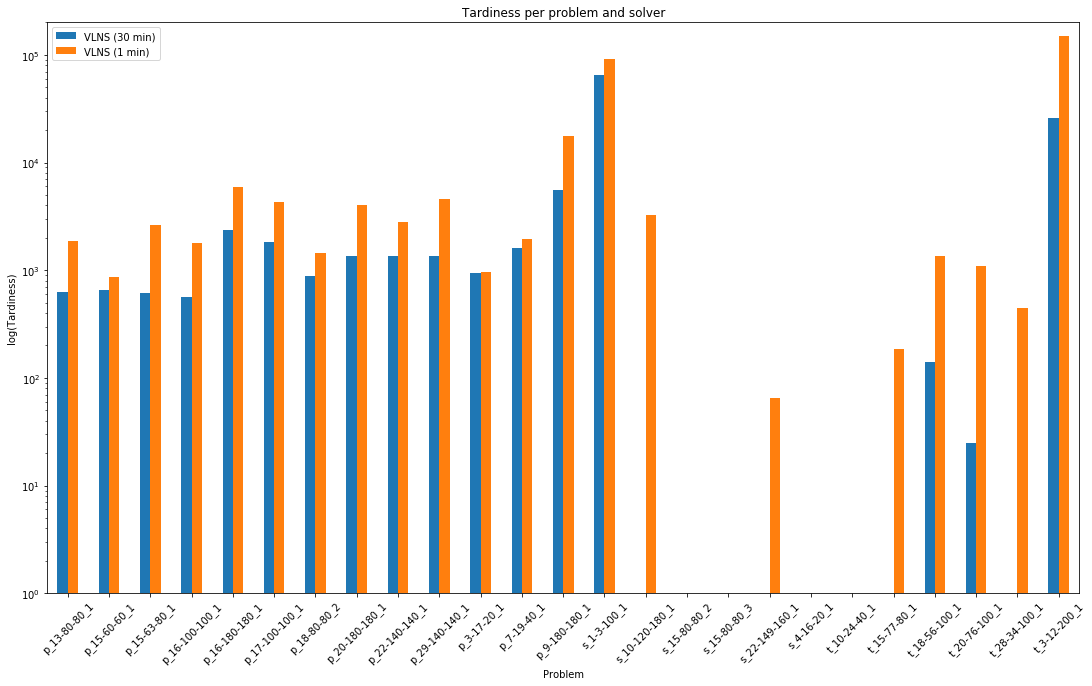

In [8]:
compareDifferentRuns(["C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0703_VLNS_1800s",
                      "C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0703_VLNS_60s",
                      ],
                      200000,
                    ["VLNS (30 min)", "VLNS (1 min)"], "VLNS_runtime")

In [93]:
print('PARALLEL RESULTS')
calcAvgResults("C:/Users/Fabian/Desktop/Informatik/CO/Experiments/20.01 Parallel Test")

print('\n\nNON PARALLEL RESULTS')
calcAvgResults("C:/Users/Fabian/Desktop/Informatik/CO/Experiments/20.01 Not Parallel Test")


PARALLEL RESULTS
60 files
Tardiness 	Avg:       679.28 	Med:       868.50 	Std:       425.99
Makespan 	Avg:      2345.63 	Med:       842.50 	Std:      2630.48
Iterations 	Avg:   3280116.73 	Med:   2547151.00 	Std:   2914061.15
Runtime 	Avg:         0.00 	Med:         0.00 	Std:         0.00


NON PARALLEL RESULTS
60 files
Tardiness 	Avg:       690.50 	Med:       882.00 	Std:       473.18
Makespan 	Avg:      2301.42 	Med:       837.00 	Std:      2595.17
Iterations 	Avg:   4600926.08 	Med:   3793810.00 	Std:   4027186.46
Runtime 	Avg:         0.00 	Med:         0.00 	Std:         0.00


In [5]:
calcAvgResults("C:/Users/Fabian/Desktop/Informatik/CO/Experiments/FirstRunOffAllValidations")

440 files
Tardiness 	Avg:      2678.69 	Med:       179.50 	Std:     24129.30
Makespan 	Avg:      4492.49 	Med:      1928.50 	Std:      8501.76
Iterations 	Avg:   1733498.52 	Med:   1022482.00 	Std:   2048596.49
Runtime 	Avg:        10.00 	Med:        10.00 	Std:         0.00


In [6]:
calcAvgResults("C:/Users/Fabian/Desktop/Informatik/CO/Experiments/TryFasterVersionAllData(Sequential)")


440 files
Tardiness 	Avg:      2223.25 	Med:       154.00 	Std:     21188.43
Makespan 	Avg:      4345.01 	Med:      1678.00 	Std:      8565.32
Iterations 	Avg:   2349481.52 	Med:   2025261.50 	Std:   1682992.79
Runtime 	Avg:        10.00 	Med:        10.00 	Std:         0.00


In [35]:
calcAvgResults("C:/Users/Fabian/Desktop/Informatik/CO/Experiments/ImprovedTardynessGuideance(Seq)")


440 files
Tardiness 	Avg:       403.47 	Med:       102.50 	Std:      1151.18
Makespan 	Avg:      3856.53 	Med:      1682.50 	Std:      7431.53
Iterations 	Avg:   3128312.51 	Med:   2915610.50 	Std:   1261068.10
Runtime 	Avg:        10.00 	Med:        10.00 	Std:         0.00


In [10]:
calcAvgResults("C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0703_VLNS_1800s")


12 files
Tardiness 	Avg:      1177.33 	Med:      1139.50 	Std:       541.01
Makespan 	Avg:       514.67 	Med:       463.50 	Std:       166.01
Runtime 	Avg:      1800.00 	Med:      1800.00 	Std:         0.00


In [19]:
compareDifferentRuns(["C:/Users/Fabian/Desktop/Informatik/CO/Experiments/31.12_MIP_30min_each"])


['31.12_MIP_30min_each']
[{'p_3-17-20_1.max.soln.info': {'Makespan': '611', 'Tardiness': '957'}, 'p_9-180-180_1.max.soln.info': {'Makespan': '820', 'Tardiness': '6905'}, 's_1-3-100_1.max.soln.info': {'Makespan': '5909', 'Tardiness': '13338'}, 't_3-12-200_1.max.soln.info': {'Makespan': '3289', 'Tardiness': '22153'}}]


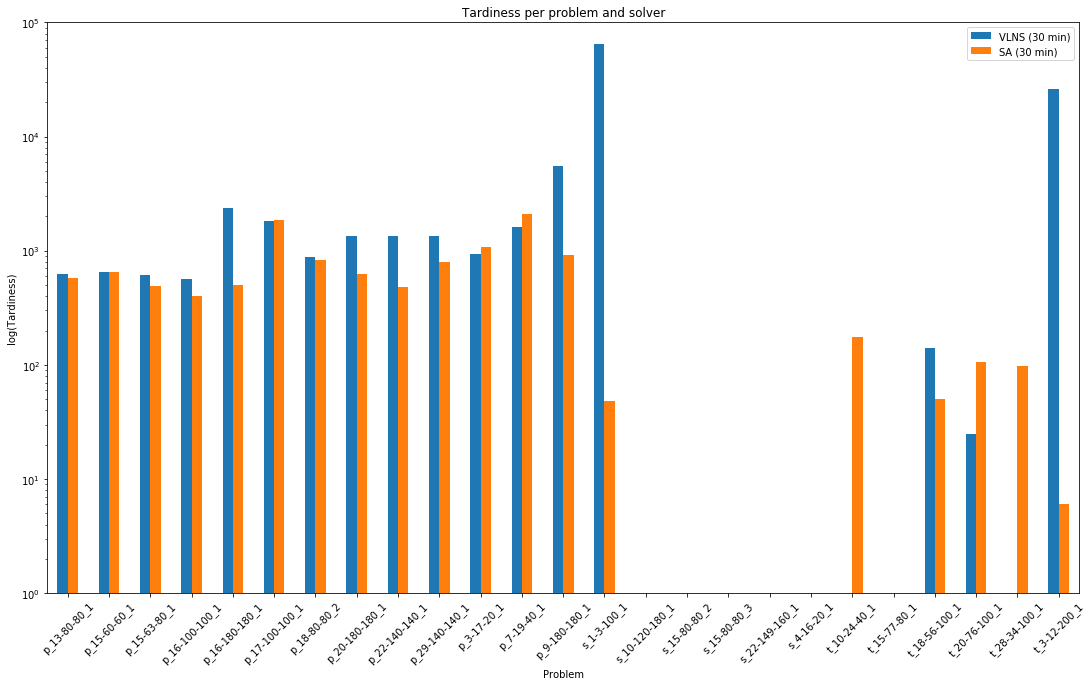

In [11]:
compareDifferentRuns(["C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0703_VLNS_1800s",
                      "C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0803_SA_1800s",
                     ], 100000,
                    ["VLNS (30 min)", "SA (30 min)"], "VLNSvsSA_30min")


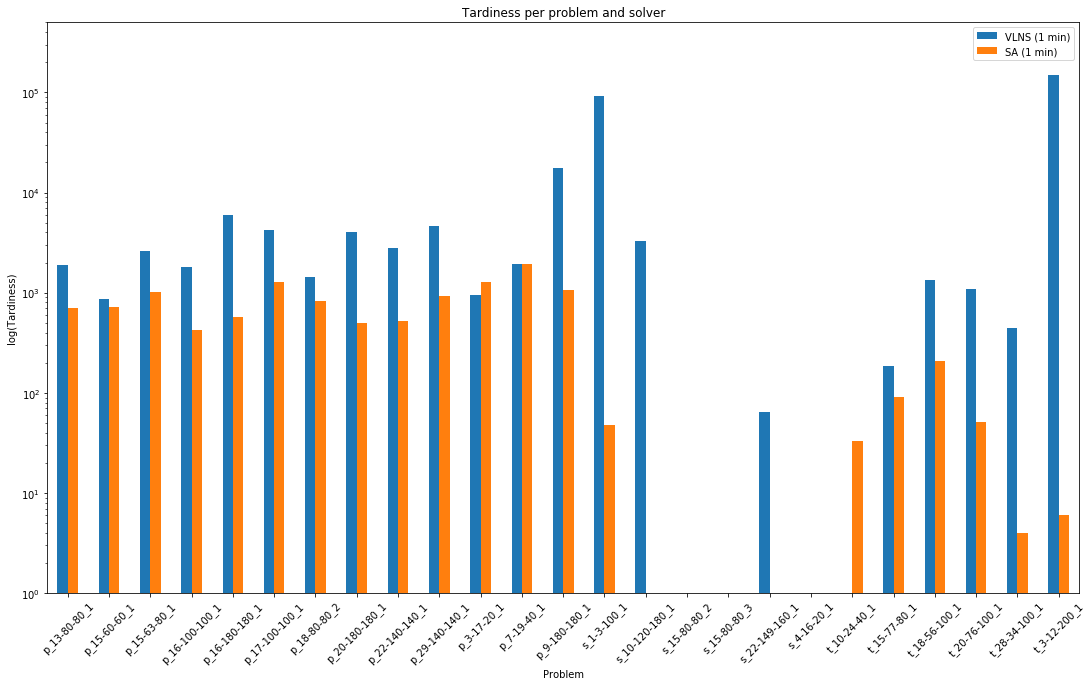

In [4]:
compareDifferentRuns(["C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0703_VLNS_60s",
                      "C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0803_SA_60s",
                     ], 500000,
                    ["VLNS (1 min)", "SA (1 min)"], "VLNSvsSA_1min")

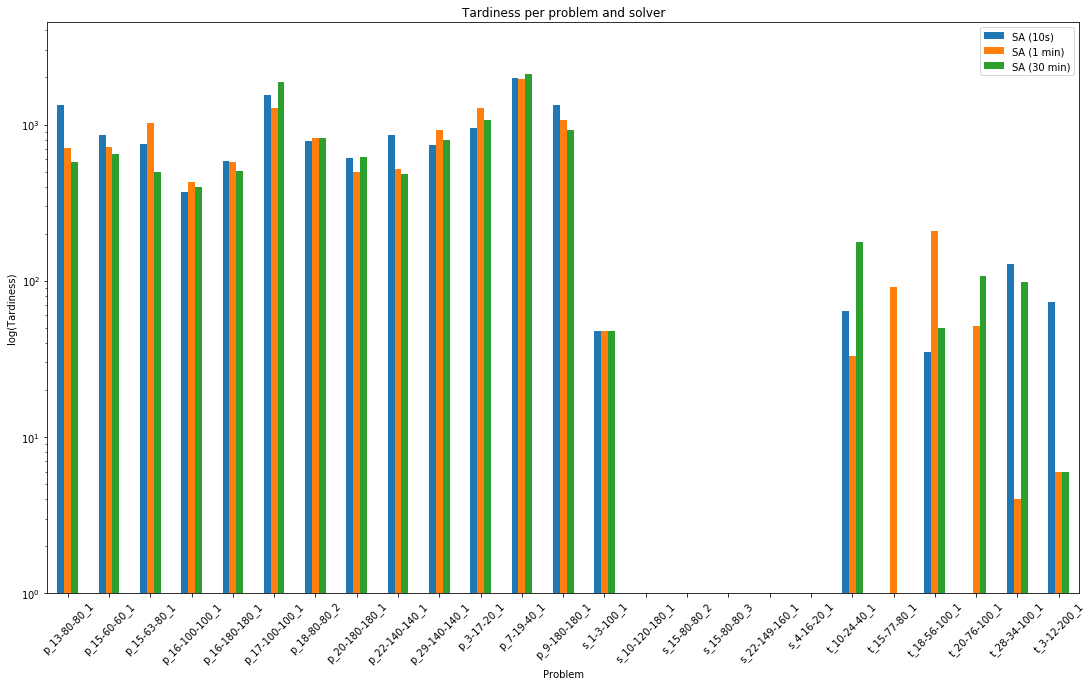

In [17]:
compareDifferentRuns(["C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0803_SA_10s",
                     "C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0803_SA_60s",
                     "C:/Users/Fabian/Desktop/Informatik/CO/Experiments/0803_SA_1800s"], 
                     4500, 
                     ["SA (10s)", "SA (1 min)", "SA (30 min)"], 
                     "SAruntime")


In [119]:
str(Path.cwd())

'C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Experiments\\MIP_30Min_each'

'C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\Experiments\\MIP_30Min_each'

'C:\\Users\\Fabian\\Desktop\\Informatik\\CO\\CO1\\Notebooks'